# 📝 Parte 1: Embedding

In [49]:

# imports
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 📚 Step 1: Vocabolario

In [2]:
words = [
    "man", "woman", "king", "queen",
    "dog", "cat", "lion", "tiger",
    "apple", "orange", "banana", "grape"
]
print("Vocabolario:", words)

Vocabolario: ['man', 'woman', 'king', 'queen', 'dog', 'cat', 'lion', 'tiger', 'apple', 'orange', 'banana', 'grape']


## 🔢 Step 2: Embedding

In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")
sentences = words
embeddings = model.encode(sentences)

print("Shape embedding:", embeddings.shape)  # (12, 384)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Shape embedding: (12, 384)


## 🔽 Step 3: Riduzione dimensionale

In [4]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(embeddings)
print("Shape dopo PCA:", reduced.shape)  # (12, 3)

Shape dopo PCA: (12, 3)


## 🎨 Step 4: Visualizzazione in 3D

In [5]:
fig = px.scatter_3d(
    x=reduced[:,0],
    y=reduced[:,1],
    z=reduced[:,2],
    text=words,  # label per ogni punto
    # hover_name=words,
    title="Visualizzazione embedding in 3D"
)
fig.show()

## 📏 Step 5: Similarità semantica

In [6]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [8]:
pairs = [("man", "king"), ("woman", "queen"), ("dog", "cat"), ("apple", "orange")]

In [14]:
for w1, w2 in pairs:

  ix = words.index(w1)
  jx = words.index(w2)
  sim = cosine_similarity(embeddings[ix],embeddings[jx])
  print(f"Similarità({w1}, {w2}): {sim:.4f}")


Similarità(man, king): 0.3216
Similarità(woman, queen): 0.4394
Similarità(dog, cat): 0.6606
Similarità(apple, orange): 0.3726


# Parte 2:
1. Sostutuisci la riduzione della dimensionalità con
    - Difficoltà bassa: T-SNE
    - Difficoltà media: UMAP
2. Difficoltà media: Spiega le differenze principali tra PCA e T-SNE/UMAP, calcola di nuovo le similtudini e scegli la riduzione della dimensionalità migliore.
3. Difficoltà bassa: Codifica il nuovo corpus in embedding
4. Difficoltà media: Applica un algoritmo di clustering a tuo piacimento usando `sklearn`
5. Difficoltà ALTA: Trova un modo di descrivere AUTOMATICAMENTE i gruppi che hai trovato (pensa agli embedding e al de-codificare)

## Corpus

In [8]:
corpus = ['abandon','ability','able','abortion','about','above','abroad','absence','absolute','absolutely','absorb','abuse','academic','accept','access','accident','accompany','accomplish','according','account','accurate','accuse','achieve','achievement','acid','acknowledge','acquire','across','act','action','active','activist','activity','actor','actress','actual','actually','ad','adapt','add','addition','additional','address','adequate','adjust','adjustment','administration','administrator','admire','admission','admit','adolescent','adopt','adult','advance','advanced','advantage','adventure','advertising','advice','advise','adviser','advocate','affair','affect','afford','afraid','African','after','afternoon','again','against','age','agency','agenda','agent','aggressive','ago','agree','agreement','agricultural','ah','ahead','aid','aide','AIDS','aim','air','aircraft','airline','airport','album','alcohol','alive','all','alliance','allow','ally','almost','alone','along','already','also','alter','alternative','although','always','AM','amazing','American','among','amount','analysis','analyst','analyze','ancient','and','anger','angle','angry','animal','anniversary','announce','annual','another','answer','anticipate','anxiety','any','anybody','anymore','anyone','anything','anyway','anywhere','apart','apartment','apparent','apparently','appeal','appear','appearance','apple','application','apply','appoint','appointment','appreciate','approach','appropriate','approval','approve','approximately','Arab','architect','area','argue','argument','arise','arm','armed','army','around','arrange','arrangement','arrest','arrival','arrive','art','article','artist','artistic','as','Asian','aside','ask','asleep','aspect','assault','assert','assess','assessment','asset','assign','assignment','assist','assistance','assistant','associate','association','assume','assumption','assure','at','athlete','athletic','atmosphere','attach','attack','attempt','attend','attention','attitude','attorney','attract','attractive','attribute','audience','author','authority','auto','available','average','avoid','award','aware','awareness','away','awful','baby','back','background','bad','badly','bag','bake','balance','ball','ban','band','bank','bar','barely','barrel','barrier','base','baseball','basic','basically','basis','basket','basketball','bathroom','battery','battle','be','beach','bean','bear','beat','beautiful','beauty','because','become','bed','bedroom','beer','before','begin','beginning','behavior','behind','being','belief','believe','bell','belong','below','belt','bench','bend','beneath','benefit','beside','besides','best','bet','better','between','beyond','Bible','big','bike','bill','billion','bind','biological','bird','birth','birthday','bit','bite','black','blade','blame','blanket','blind','block','blood','blow','blue','board','boat','body','bomb','bombing','bond','bone','book','boom','boot','border','born','borrow','boss','both','bother','bottle','bottom','boundary','bowl','box','boy','boyfriend','brain','branch','brand','bread','break','breakfast','breast','breath','breathe','brick','bridge','brief','briefly','bright','brilliant','bring','British','broad','broken','brother','brown','brush','buck','budget','build','building','bullet','bunch','burden','burn','bury','bus','business','busy','but','butter','button','buy','buyer','by','cabin','cabinet','cable','cake','calculate','call','camera','camp','campaign','campus','can','Canadian','cancer','candidate','cap','capability','capable','capacity','capital','captain','capture','car','carbon','card','care','career','careful','carefully','carrier','carry','case','cash','cast','cat','catch','category','Catholic','cause','ceiling','celebrate','celebration','celebrity','cell','center','central','century','CEO','ceremony','certain','certainly','chain','chair','chairman','challenge','chamber','champion','championship','chance','change','changing','channel','chapter','character','characteristic','characterize','charge','charity','chart','chase','cheap','check','cheek','cheese','chef','chemical','chest','chicken','chief','child','childhood','Chinese','chip','chocolate','choice','cholesterol','choose','Christian','Christmas','church','cigarette','circle','circumstance','cite','citizen','city','civil','civilian','claim','class','classic','classroom','clean','clear','clearly','client','climate','climb','clinic','clinical','clock','close','closely','closer','clothes','clothing','cloud','club','clue','cluster','coach','coal','coalition','coast','coat','code','coffee','cognitive','cold','collapse','colleague','collect','collection','collective','college','colonial','color','column','combination','combine','come','comedy','comfort','comfortable','command','commander','comment','commercial','commission','commit','commitment','committee','common','communicate','communication','community','company','compare','comparison','compete','competition','competitive','competitor','complain','complaint','complete','completely','complex','complicated','component','compose','composition','comprehensive','computer','concentrate','concentration','concept','concern','concerned','concert','conclude','conclusion','concrete','condition','conduct','conference','confidence','confident','confirm','conflict','confront','confusion','Congress','congressional','connect','connection','consciousness','consensus','consequence','conservative','consider','considerable','consideration','consist','consistent','constant','constantly','constitute','constitutional','construct','construction','consultant','consume','consumer','consumption','contact','contain','container','contemporary','content','contest','context','continue','continued','contract','contrast','contribute','contribution','control','controversial','controversy','convention','conventional','conversation','convert','conviction','convince','cook','cookie','cooking','cool','cooperation','cop','cope','copy','core','corn','corner','corporate','corporation','correct','correspondent','cost','cotton','couch','could','council','counselor','count','counter','country','county','couple','courage','course','court','cousin','cover','coverage','cow','crack','craft','crash','crazy','cream','create','creation','creative','creature','credit','crew','crime','criminal','crisis','criteria','critic','critical','criticism','criticize','crop','cross','crowd','crucial','cry','cultural','culture','cup','curious','current','currently','curriculum','custom','customer','cut','cycle','dad','daily','damage','dance','danger','dangerous','dare','dark','darkness','data','date','daughter','day','dead','deal','dealer','dear','death','debate','debt','decade','decide','decision','deck','declare','decline','decrease','deep','deeply','deer','defeat','defend','defendant','defense','defensive','deficit','define','definitely','definition','degree','delay','deliver','delivery','demand','democracy','Democrat','democratic','demonstrate','demonstration','deny','department','depend','dependent','depending','depict','depression','depth','deputy','derive','describe','description','desert','deserve','design','designer','desire','desk','desperate','despite','destroy','destruction','detail','detailed','detect','determine','develop','developing','development','device','devote','dialogue','die','diet','differ','difference','different','differently','difficult','difficulty','dig','digital','dimension','dining','dinner','direct','direction','directly','director','dirt','dirty','disability','disagree','disappear','disaster','discipline','discourse','discover','discovery','discrimination','discuss','discussion','disease','dish','dismiss','disorder','display','dispute','distance','distant','distinct','distinction','distinguish','distribute','distribution','district','diverse','diversity','divide','division','divorce','DNA','do','doctor','document','dog','domestic','dominant','dominate','door','double','doubt','down','downtown','dozen','draft','drag','drama','dramatic','dramatically','draw','drawing','dream','dress','drink','drive','driver','drop','drug','dry','due','during','dust','duty','each','eager','ear','early','earn','earnings','earth','ease','easily','east','eastern','easy','eat','economic','economics','economist','economy','edge','edition','editor','educate','education','educational','educator','effect','effective','effectively','efficiency','efficient','effort','egg','eight','either','elderly','elect','election','electric','electricity','electronic','element','elementary','eliminate','elite','else','elsewhere','embrace','emerge','emergency','emission','emotion','emotional','emphasis','emphasize','employ','employee','employer','employment','empty','enable','encounter','encourage','end','enemy','energy','enforcement','engage','engine','engineer','engineering','English','enhance','enjoy','enormous','enough','ensure','enter','enterprise','entertainment','entire','entirely','entrance','entry','environment','environmental','episode','equal','equally','equipment','era','error','escape','especially','essay','essential','essentially','establish','establishment','estate','estimate','etc','ethics','ethnic','European','evaluate','evaluation','even','evening','event','eventually','ever','every','everybody','everyday','everyone','everything','everywhere','evidence','evolution','evolve','exact','exactly','examination','examine','example','exceed','excellent','except','exception','exchange','exciting','executive','exercise','exhibit','exhibition','exist','existence','existing','expand','expansion','expect','expectation','expense','expensive','experience','experiment','expert','explain','explanation','explode','explore','explosion','expose','exposure','express','expression','extend','extension','extensive','extent','external','extra','extraordinary','extreme','extremely','eye','fabric','face','facility','fact','factor','factory','faculty','fade','fail','failure','fair','fairly','faith','fall','false','familiar','family','famous','fan','fantasy','far','farm','farmer','fashion','fast','fat','fate','father','fault','favor','favorite','fear','feature','federal','fee','feed','feel','feeling','fellow','female','fence','few','fewer','fiber','fiction','field','fifteen','fifth','fifty','fight','fighter','fighting','figure','file','fill','film','final','finally','finance','financial','find','finding','fine','finger','finish','fire','firm','first','fish','fishing','fit','fitness','five','fix','flag','flame','flat','flavor','flee','flesh','flight','float','floor','flow','flower','fly','focus','folk','follow','following','food','foot','football','for','force','foreign','forest','forever','forget','form','formal','formation','former','formula','forth','fortune','forward','found','foundation','founder','four','fourth','frame','framework','free','freedom','freeze','French','frequency','frequent','frequently','fresh','friend','friendly','friendship','from','front','fruit','frustration','fuel','full','fully','fun','function','fund','fundamental','funding','funeral','funny','furniture','furthermore','future','gain','galaxy','gallery','game','gang','gap','garage','garden','garlic','gas','gate','gather','gay','gaze','gear','gender','gene','general','generally','generate','generation','genetic','gentleman','gently','German','gesture','get','ghost','giant','gift','gifted','girl','girlfriend','give','given','glad','glance','glass','global','glove','go','goal','God','gold','golden','golf','good','government','governor','grab','grade','gradually','graduate','grain','grand','grandfather','grandmother','grant','grass','grave','gray','great','greatest','green','grocery','ground','group','grow','growing','growth','guarantee','guard','guess','guest','guide','guideline','guilty','gun','guy','habit','habitat','hair','half','hall','hand','handful','handle','hang','happen','happy','hard','hardly','hat','hate','have','he','head','headline','headquarters','health','healthy','hear','hearing','heart','heat','heaven','heavily','heavy','heel','height','helicopter','hell','hello','help','helpful','her','here','heritage','hero','herself','hey','hi','hide','high','highlight','highly','highway','hill','him','himself','hip','hire','his','historian','historic','historical','history','hit','hold','hole','holiday','holy','home','homeless','honest','honey','honor','hope','horizon','horror','horse','hospital','host','hot','hotel','hour','house','household','housing','how','however','huge','human','humor','hundred','hungry','hunter','hunting','hurt','husband','hypothesis','I','ice','idea','ideal','identification','identify','identity','ie','if','ignore','ill','illegal','illness','illustrate','image','imagination','imagine','immediate','immediately','immigrant','immigration','impact','implement','implication','imply','importance','important','impose','impossible','impress','impression','impressive','improve','improvement','in','incentive','incident','include','including','income','incorporate','increase','increased','increasing','increasingly','incredible','indeed','independence','independent','index','Indian','indicate','indication','individual','industrial','industry','infant','infection','inflation','influence','inform','information','ingredient','initial','initially','initiative','injury','inner','innocent','inquiry','inside','insight','insist','inspire','install','instance','instead','institution','institutional','instruction','instructor','instrument','insurance','intellectual','intelligence','intend','intense','intensity','intention','interaction','interest','interested','interesting','internal','international','Internet','interpret','interpretation','intervention','interview','into','introduce','introduction','invasion','invest','investigate','investigation','investigator','investment','investor','invite','involve','involved','involvement','Iraqi','Irish','iron','Islamic','island','Israeli','issue','it','Italian','item','its','itself','jacket','jail','Japanese','jet','Jew','Jewish','job','join','joint','joke','journal','journalist','journey','joy','judge','judgment','juice','jump','junior','jury','just','justice','justify','keep','key','kick','kid','kill','killer','killing','kind','king','kiss','kitchen','knee','knife','knock','know','knowledge','lab','label','labor','laboratory','lack','lady','lake','land','landscape','language','lap','large','largely','last','late','later','Latin','latter','laugh','launch','law','lawn','lawsuit','lawyer','lay','layer','lead','leader','leadership','leading','leaf','league','lean','learn','learning','least','leather','leave','left','leg','legacy','legal','legend','legislation','legitimate','lemon','length','less','lesson','let','letter','level','liberal','library','license','lie','life','lifestyle','lifetime','lift','light','like','likely','limit','limitation','limited','line','link','lip','list','listen','literally','literary','literature','little','live','living','load','loan','local','locate','location','lock','long','longterm','look','loose','lose','loss','lost','lot','lots','loud','love','lovely','lover','low','lower','luck','lucky','lunch','lung','machine','mad','magazine','mail','main','mainly','maintain','maintenance','major','majority','make','maker','makeup','male','mall','man','manage','management','manager','manner','manufacturer','manufacturing','many','map','margin','mark','market','marketing','marriage','married','marry','mask','mass','massive','master','match','material','math','matter','may','maybe','mayor','me','meal','mean','meaning','meanwhile','measure','measurement','meat','mechanism','media','medical','medication','medicine','medium','meet','meeting','member','membership','memory','mental','mention','menu','mere','merely','mess','message','metal','meter','method','Mexican','middle','might','military','milk','million','mind','mine','minister','minor','minority','minute','miracle','mirror','miss','missile','mission','mistake','mix','mixture','mode','model','moderate','modern','modest','mom','moment','money','monitor','month','mood','moon','moral','more','moreover','morning','mortgage','most','mostly','mother','motion','motivation','motor','mount','mountain','mouse','mouth','move','movement','movie','Mr','Mrs','Ms','much','multiple','murder','muscle','museum','music','musical','musician','Muslim','must','mutual','my','myself','mystery','myth','naked','name','narrative','narrow','nation','national','native','natural','naturally','nature','near','nearby','nearly','necessarily','necessary','neck','need','negative','negotiate','negotiation','neighbor','neighborhood','neither','nerve','nervous','net','network','never','nevertheless','new','newly','news','newspaper','next','nice','night','nine','no','nobody','nod','noise','nomination','none','nonetheless','nor','normal','normally','north','northern','nose','not','note','nothing','notice','notion','novel','now','nowhere','nuclear','number','numerous','nurse','nut','object','objective','obligation','observation','observe','observer','obtain','obvious','obviously','occasion','occasionally','occupation','occupy','occur','ocean','odd','odds','of','off','offense','offensive','offer','office','officer','official','often','oh','oil','ok','okay','old','Olympic','on','once','one','ongoing','onion','online','only','onto','open','opening','operate','operating','operation','operator','opinion','opponent','opportunity','oppose','opposite','opposition','option','or','orange','order','ordinary','organic','organization','organize','orientation','origin','original','originally','other','others','otherwise','ought','our','ourselves','out','outcome','outside','oven','over','overall','overcome','overlook','owe','own','owner','pace','pack','package','page','pain','painful','paint','painter','painting','pair','pale','Palestinian','palm','pan','panel','pant','paper','parent','park','parking','part','participant','participate','participation','particular','particularly','partly','partner','partnership','party','pass','passage','passenger','passion','past','patch','path','patient','pattern','pause','pay','payment','PC','peace','peak','peer','penalty','people','pepper','per','perceive','percentage','perception','perfect','perfectly','perform','performance','perhaps','period','permanent','permission','permit','person','personal','personality','personally','personnel','perspective','persuade','pet','phase','phenomenon','philosophy','phone','photo','photograph','photographer','phrase','physical','physically','physician','piano','pick','picture','pie','piece','pile','pilot','pine','pink','pipe','pitch','place','plan','plane','planet','planning','plant','plastic','plate','platform','play','player','please','pleasure','plenty','plot','plus','PM','pocket','poem','poet','poetry','point','pole','police','policy','political','politically','politician','politics','poll','pollution','pool','poor','pop','popular','population','porch','port','portion','portrait','portray','pose','position','positive','possess','possibility','possible','possibly','post','pot','potato','potential','potentially','pound','pour','poverty','powder','power','powerful','practical','practice','pray','prayer','precisely','predict','prefer','preference','pregnancy','pregnant','preparation','prepare','prescription','presence','present','presentation','preserve','president','presidential','press','pressure','pretend','pretty','prevent','previous','previously','price','pride','priest','primarily','primary','prime','principal','principle','print','prior','priority','prison','prisoner','privacy','private','probably','problem','procedure','proceed','process','produce','producer','product','production','profession','professional','professor','profile','profit','program','progress','project','prominent','promise','promote','prompt','proof','proper','properly','property','proportion','proposal','propose','proposed','prosecutor','prospect','protect','protection','protein','protest','proud','prove','provide','provider','province','provision','psychological','psychologist','psychology','public','publication','publicly','publish','publisher','pull','punishment','purchase','pure','purpose','pursue','push','put','qualify','quality','quarter','quarterback','question','quick','quickly','quiet','quietly','quit','quite','quote','race','racial','radical','radio','rail','rain','raise','range','rank','rapid','rapidly','rare','rarely','rate','rather','rating','ratio','raw','reach','react','reaction','read','reader','reading','ready','real','reality','realize','really','reason','reasonable','recall','receive','recent','recently','recipe','recognition','recognize','recommend','recommendation','record','recording','recover','recovery','recruit','red','reduce','reduction','refer','reference','reflect','reflection','reform','refugee','refuse','regard','regarding','regardless','regime','region','regional','register','regular','regularly','regulate','regulation','reinforce','reject','relate','relation','relationship','relative','relatively','relax','release','relevant','relief','religion','religious','rely','remain','remaining','remarkable','remember','remind','remote','remove','repeat','repeatedly','replace','reply','report','reporter','represent','representation','representative','Republican','reputation','request','require','requirement','research','researcher','resemble','reservation','resident','resist','resistance','resolution','resolve','resort','resource','respect','respond','respondent','response','responsibility','responsible','rest','restaurant','restore','restriction','result','retain','retire','retirement','return','reveal','revenue','review','revolution','rhythm','rice','rich','rid','ride','rifle','right','ring','rise','risk','river','road','rock','role','roll','romantic','roof','room','root','rope','rose','rough','roughly','round','route','routine','row','rub','rule','run','running','rural','rush','Russian','sacred','sad','safe','safety','sake','salad','salary','sale','sales','salt','same','sample','sanction','sand','satellite','satisfaction','satisfy','sauce','save','saving','say','scale','scandal','scared','scenario','scene','schedule','scheme','scholar','scholarship','school','science','scientific','scientist','scope','score','scream','screen','script','sea','search','season','seat','second','secret','secretary','section','sector','secure','security','see','seed','seek','seem','segment','seize','select','selection','self','sell','Senate','senator','send','senior','sense','sensitive','sentence','separate','sequence','series','serious','seriously','serve','service','session','set','setting','settle','settlement','seven','several','severe','sex','sexual','shade','shadow','shake','shall','shape','share','sharp','she','sheet','shelf','shell','shelter','shift','shine','ship','shirt','shit','shock','shoe','shoot','shooting','shop','shopping','shore','short','shortly','shot','should','shoulder','shout','show','shower','shrug','shut','sick','side','sigh','sight','sign','signal','significance','significant','significantly','silence','silent','silver','similar','similarly','simple','simply','sin','since','sing','singer','single','sink','sir','sister','sit','site','situation','six','size','ski','skill','skin','sky','slave','sleep','slice','slide','slight','slightly','slip','slow','slowly','small','smart','smell','smile','smoke','smooth','snap','snow','so','called','soccer','social','society','soft','software','soil','solar','soldier','solid','solution','solve','some','somebody','somehow','someone','something','sometimes','somewhat','somewhere','son','song','soon','sophisticated','sorry','sort','soul','sound','soup','source','south','southern','Soviet','space','Spanish','speak','speaker','special','specialist','species','specific','specifically','speech','speed','spend','spending','spin','spirit','spiritual','split','spokesman','sport','spot','spread','spring','square','squeeze','stability','stable','staff','stage','stair','stake','stand','standard','standing','star','stare','start','state','statement','station','statistics','status','stay','steady','steal','steel','step','stick','still','stir','stock','stomach','stone','stop','storage','store','storm','story','straight','strange','stranger','strategic','strategy','stream','street','strength','strengthen','stress','stretch','strike','string','strip','stroke','strong','strongly','structure','struggle','student','studio','study','stuff','stupid','style','subject','submit','subsequent','substance','substantial','succeed','success','successful','successfully','such','sudden','suddenly','sue','suffer','sufficient','sugar','suggest','suggestion','suicide','suit','summer','summit','sun','super','supply','support','supporter','suppose','supposed','Supreme','sure','surely','surface','surgery','surprise','surprised','surprising','surprisingly','surround','survey','survival','survive','survivor','suspect','sustain','swear','sweep','sweet','swim','swing','switch','symbol','symptom','system','table','tablespoon','tactic','tail','take','tale','talent','talk','tall','tank','tap','tape','target','task','taste','tax','taxpayer','tea','teach','teacher','teaching','team','tear','teaspoon','technical','technique','technology','teen','teenager','telephone','telescope','television','tell','temperature','temporary','ten','tend','tendency','tennis','tension','tent','term','terms','terrible','territory','terror','terrorism','terrorist','test','testify','testimony','testing','text','than','thank','thanks','that','the','theater','their','them','theme','themselves','then','theory','therapy','there','therefore','these','they','thick','thin','thing','think','thinking','third','thirty','this','those','though','thought','thousand','threat','threaten','three','throat','through','throughout','throw','thus','ticket','tie','tight','time','tiny','tip','tire','tired','tissue','title','to','tobacco','today','toe','together','tomato','tomorrow','tone','tongue','tonight','too','tool','tooth','top','topic','toss','total','totally','touch','tough','tour','tourist','tournament','toward','towards','tower','town','toy','trace','track','trade','tradition','traditional','traffic','tragedy','trail','train','training','transfer','transform','transformation','transition','translate','transportation','travel','treat','treatment','treaty','tree','tremendous','trend','trial','tribe','trick','trip','troop','trouble','truck','true','truly','trust','truth','try','tube','tunnel','turn','TV','twelve','twenty','twice','twin','two','type','typical','typically','ugly','ultimate','ultimately','unable','uncle','under','undergo','understand','understanding','unfortunately','uniform','union','unique','unit','United','universal','universe','university','unknown','unless','unlike','unlikely','until','unusual','up','upon','upper','urban','urge','us','use','used','useful','user','usual','usually','utility','vacation','valley','valuable','value','variable','variation','variety','various','vary','vast','vegetable','vehicle','venture','version','versus','very','vessel','veteran','via','victim','victory','video','view','viewer','village','violate','violation','violence','violent','virtually','virtue','virus','visible','vision','visit','visitor','visual','vital','voice','volume','volunteer','vote','voter','vs','vulnerable','wage','wait','wake','walk','wall','wander','want','war','warm','warn','warning','wash','waste','watch','water','wave','way','we','weak','wealth','wealthy','weapon','wear','weather','wedding','week','weekend','weekly','weigh','weight','welcome','welfare','well','west','western','wet','what','whatever','wheel','when','whenever','where','whereas','whether','which','while','whisper','white','who','whole','whom','whose','why','wide','widely','widespread','wife','wild','will','willing','win','wind','window','wine','wing','winner','winter','wipe','wire','wisdom','wise','wish','with','withdraw','within','without','witness','woman','wonder','wonderful','wood','wooden','word','work','worker','working','works','workshop','world','worried','worry','worth','would','wound','wrap','write','writer','writing','wrong','yard','yeah','year','yell','yellow','yes','yesterday','yet','yield','you','young','your','yours','yourself','youth','zone']

## Continua

In [30]:
#Embedding

from sklearn.manifold import TSNE

model = SentenceTransformer("all-mpnet-base-v2")
sentences = corpus
embeddings = model.encode(sentences)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [35]:
#Clusterizzazione
from sklearn.cluster import DBSCAN


#kmeans_cluster = KMeans(n_clusters=10,random_state=42).fit(embeddings)
#labels = kmeans_cluster.labels_

dbscan = DBSCAN(eps=0.5,min_samples=10)
labels_dbscan = dbscan.fit_predict(embeddings)


In [61]:
# Riduzione dimensionale
import umap

reducer = umap.UMAP(n_neighbors=150,n_components=2,learning_rate=0.10,metric='cosine')

embedded = reducer.fit_transform(embeddings)


In [62]:
df = pd.DataFrame({
    "x": embedded[:, 0],
    "y": embedded[:, 1],
    "cluster": labels
})


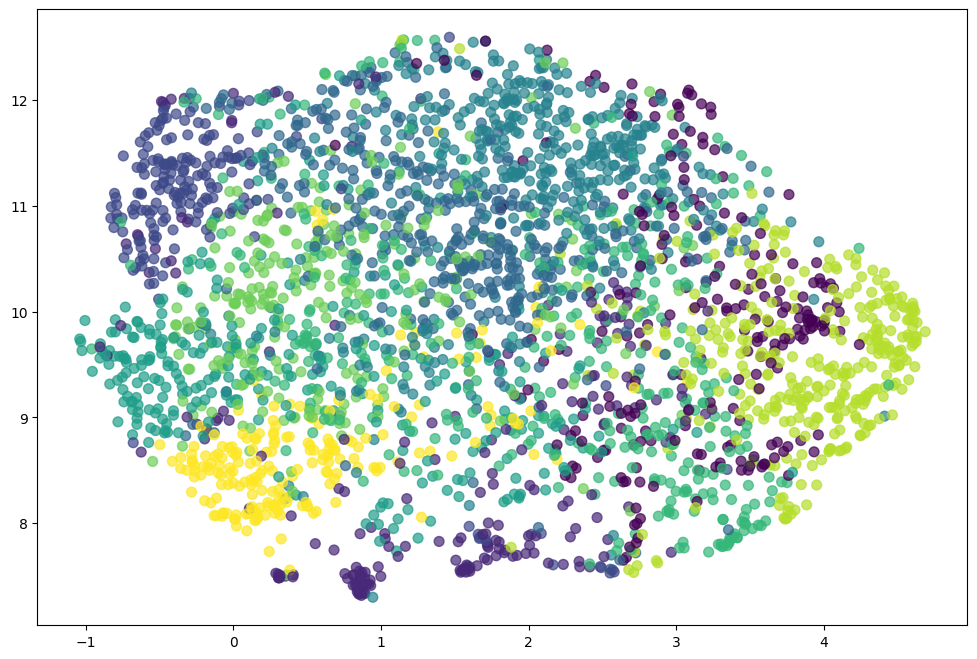

In [63]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df["x"], df["y"], c=df["cluster"], cmap="viridis", s=50, alpha=0.7)